In [131]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics 
%matplotlib inline

# Importing data

In [83]:
text=open("seeds_dataset.txt")

In [84]:
frame=[]
for i in text.readlines():
    frame.append(i[:-1].split("\t"))

In [85]:
df=pd.DataFrame(frame)

In [47]:
df

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.2,0.8783,5.137,2.981,3.631,4.87,3
206,11.23,12.88,0.8511,5.14,2.795,4.325,5.003,3
207,13.2,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       210 non-null    object
 1   1       210 non-null    object
 2   2       210 non-null    object
 3   3       210 non-null    object
 4   4       210 non-null    object
 5   5       210 non-null    object
 6   6       210 non-null    object
 7   7       210 non-null    object
dtypes: object(8)
memory usage: 13.2+ KB


In [87]:
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# Preprocessig

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       210 non-null    object
 1   1       210 non-null    object
 2   2       210 non-null    object
 3   3       210 non-null    object
 4   4       210 non-null    object
 5   5       210 non-null    object
 6   6       210 non-null    object
 7   7       210 non-null    object
dtypes: object(8)
memory usage: 13.2+ KB


**So we don't have any missing values but the problem is that we should chainge objects to floats**

In [89]:
df[0]=df[0].astype(str).astype(float)

In [90]:
df[1]=df[1].astype(str).astype(float)

In [91]:
df[2]=df[2].astype(str).astype(float)

In [92]:
df[3]=df[3].astype(str).astype(float)

In [93]:
df[4]=df[4].astype(str).astype(float)

In [94]:
df[5]=df[5].astype(str).astype(float)

In [95]:
df[6]=df[6].astype(str).astype(float)

In [96]:
df[7]=pd.to_numeric(df[7], downcast="integer")

In [97]:
df=df.rename(columns={0:"area",1:"perimeter ",2:"compactness",3:"length of kernel",4:"width of kernel",5:"asymmetry coefficient",6:"length of kernal groove",7:"Target"})

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernal groove  210 non-null    float64
 7   Target                   210 non-null    float64
dtypes: float64(8)
memory usage: 13.2 KB


In [78]:
df.describe()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernal,Target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


# Information extraction

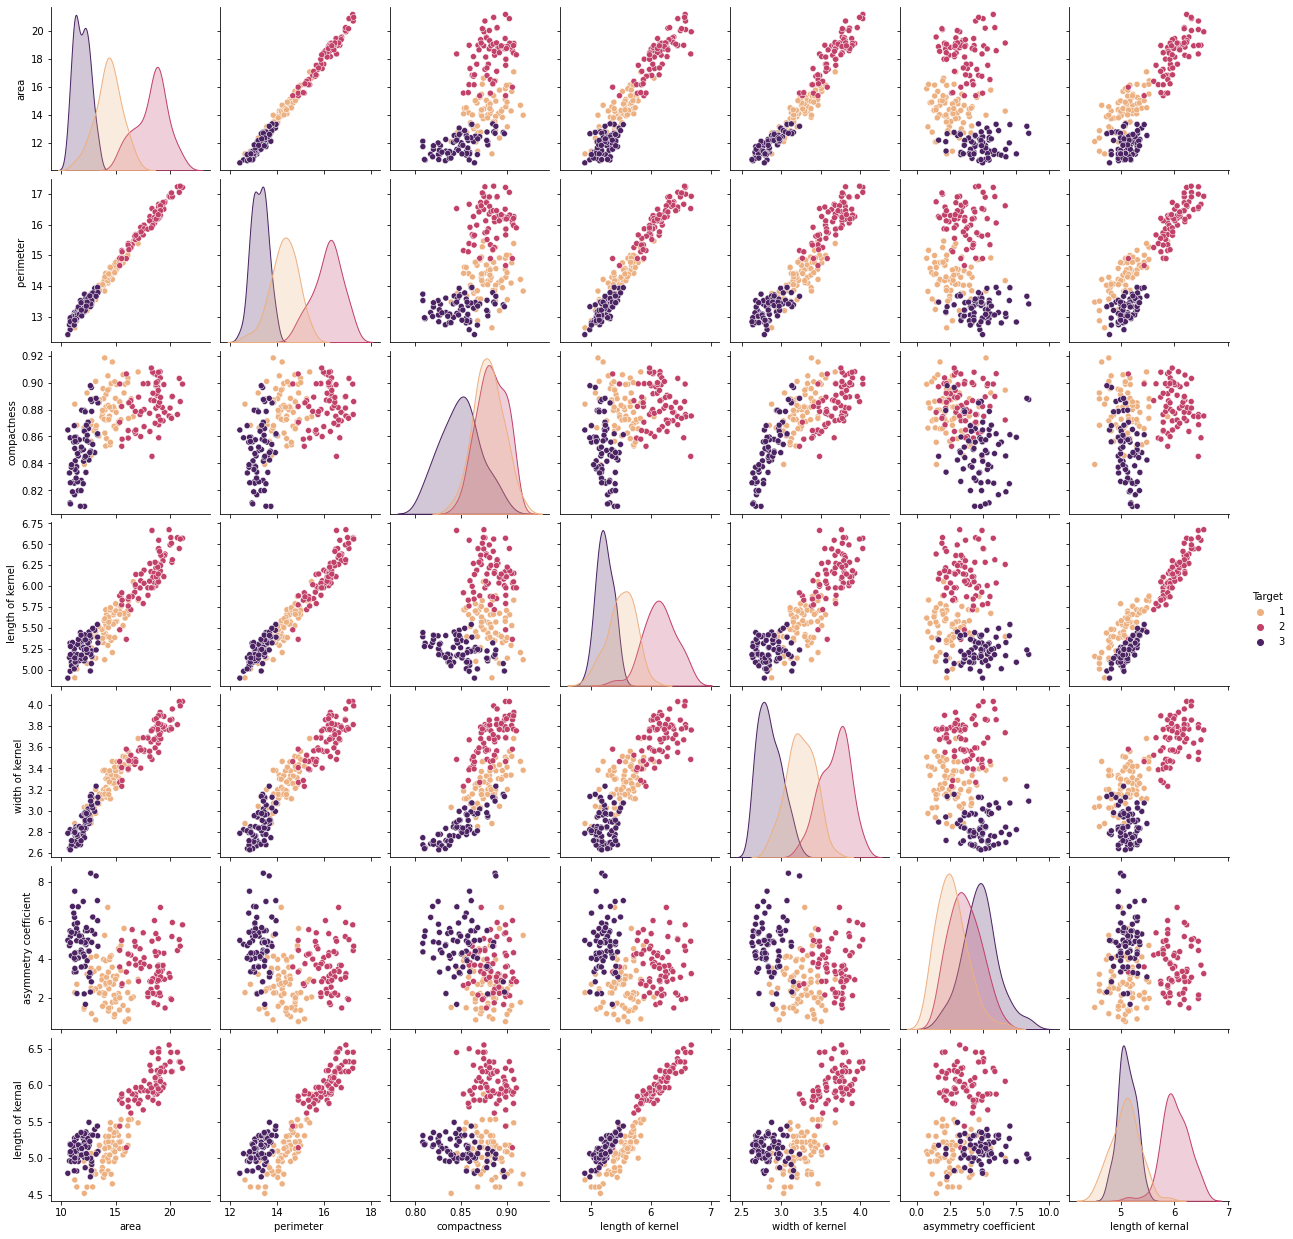

In [79]:
sns.pairplot(df,hue="Target",palette="flare")

**There are some strict lines lets check them with heat map to see whether they are duplicated or not**

<AxesSubplot:>

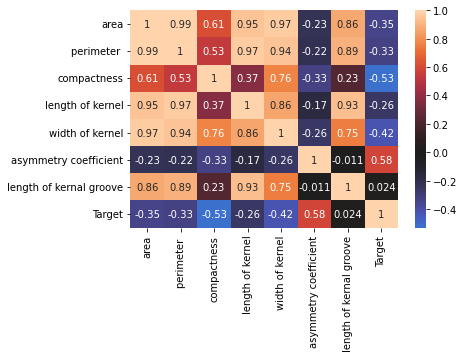

In [101]:
sns.heatmap(df.corr(),center=0,annot=True)

**because of high correlation of area with other parameters we find that they are duplicated so lets drop them**

In [104]:
df=df.drop(["perimeter ",'length of kernel',
       'width of kernel','length of kernal groove'],axis=1)

<AxesSubplot:>

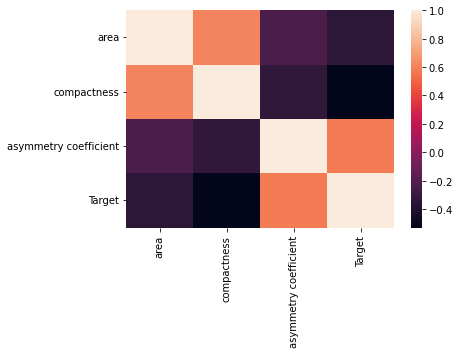

In [106]:
sns.heatmap(df.corr())

**It is bettr now**

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

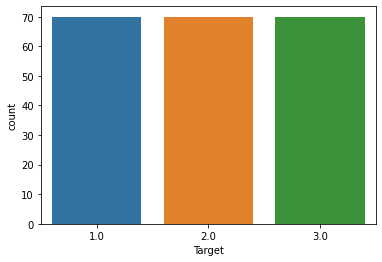

In [110]:
sns.countplot(df["Target"])

**Differant categories are evenly distributed which is good and we can rely more on accuracy tag in the classification report**

In [116]:
df.groupby(by="Target").mean()

,area,compactness,asymmetry coefficient
Target,,,
1.0,14.334429,0.880070,2.667403
2.0,18.334286,0.883517,3.644800
3.0,11.873857,0.849409,4.788400


**So type 2 is being grew in bigger areas**
**Also type 2 is more compact**
**And type 3 has the most asymmetry coefficency**

***Though we have small dataset I prefered to use sklearn inspite of NN***

# Scaling and splitting data

In [119]:
from sklearn.model_selection import train_test_split

In [117]:
from sklearn.preprocessing import MinMaxScaler

In [125]:
mms=MinMaxScaler()

In [118]:
x=df.drop("Target",axis=1)
y=df["Target"]

In [120]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [126]:
xtrain_std=mms.fit_transform(xtrain)

In [127]:
xtest_std=mms.transform(xtest)

# KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
knnc=KNeighborsClassifier()

In [130]:
knnc_pred=knnc.fit(xtrain_std,ytrain).predict(xtest_std)

In [134]:
print("Raw knn confusion matrix")
print(metrics.confusion_matrix(ytest,knnc_pred))

print("=============================")
print("Raw knn classification report")
print(metrics.classification_report(ytest,knnc_pred))

Raw knn confusion matrix
[[14  1  3]
 [ 2 17  0]
 [ 1  0 15]]
Raw knn classification report
              precision    recall  f1-score   support

         1.0       0.82      0.78      0.80        18
         2.0       0.94      0.89      0.92        19
         3.0       0.83      0.94      0.88        16

    accuracy                           0.87        53
   macro avg       0.87      0.87      0.87        53
weighted avg       0.87      0.87      0.87        53



# Tuning knn

In [136]:
from sklearn.model_selection import GridSearchCV

In [137]:
temp={"n_neighbors":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [138]:
knn_gscv=GridSearchCV(knnc,temp)

In [145]:
knn_gscv.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]})

In [146]:
print(f"{knn_gscv.best_params_=} is the best parameter")
print(f"{knn_gscv.best_score_=} is the best score")

knn_gscv.best_params_={'n_neighbors': 17} is the best parameter
knn_gscv.best_score_=0.9142857142857143 is the best score


# Logestic regression

In [147]:
from sklearn.linear_model import LogisticRegression

In [150]:
lr=LogisticRegression()

In [151]:
lr_pred=lr.fit(xtrain_std,ytrain).predict(xtest_std)

In [152]:
print("Raw knn confusion matrix")
print(metrics.confusion_matrix(ytest,lr_pred))

print("=============================")
print("Raw knn classification report")
print(metrics.classification_report(ytest,lr_pred))

Raw knn confusion matrix
[[13  1  4]
 [ 1 18  0]
 [ 2  0 14]]
Raw knn classification report
              precision    recall  f1-score   support

         1.0       0.81      0.72      0.76        18
         2.0       0.95      0.95      0.95        19
         3.0       0.78      0.88      0.82        16

    accuracy                           0.85        53
   macro avg       0.85      0.85      0.85        53
weighted avg       0.85      0.85      0.85        53



# Tuning lr

In [153]:
temp={"penalty":['l1', 'l2', 'elasticnet'],
     "tol":[.001,0.0001,.00001,.000001]}

In [154]:
lr_gscv=GridSearchCV(lr,temp)
lr_gscv.fit(x,y)

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\mahyar_fardin\anaconda3\lib\

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\mahyar_fardin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\mahyar_fardin\anacon

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'tol': [0.001, 0.0001, 1e-05, 1e-06]})

In [155]:
print(f"{lr_gscv.best_params_=} is the best parameter")
print(f"{lr_gscv.best_score_=} is the best score")

lr_gscv.best_params_={'penalty': 'l2', 'tol': 0.001} is the best parameter
lr_gscv.best_score_=0.8857142857142858 is the best score


# DTC

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
dtc=DecisionTreeClassifier()

In [158]:
dtc_pred=dtc.fit(xtrain_std,ytrain).predict(xtest_std)

In [160]:
print("Raw knn confusion matrix")
print(metrics.confusion_matrix(ytest,dtc_pred))

print("=============================")
print("Raw knn classification report")
print(metrics.classification_report(ytest,dtc_pred))

Raw knn confusion matrix
[[14  2  2]
 [ 1 18  0]
 [ 2  0 14]]
Raw knn classification report
              precision    recall  f1-score   support

         1.0       0.82      0.78      0.80        18
         2.0       0.90      0.95      0.92        19
         3.0       0.88      0.88      0.88        16

    accuracy                           0.87        53
   macro avg       0.87      0.87      0.87        53
weighted avg       0.87      0.87      0.87        53



# Tunning DTC

In [161]:
temp={"criterion":["gini", "entropy"]}

In [162]:
dtc_gscv=GridSearchCV(dtc,temp)
dtc_gscv.fit(x,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})

In [164]:
print(f"{dtc_gscv.best_params_=} is the best parameter")
print(f"{dtc_gscv.best_score_=} is the best score")

dtc_gscv.best_params_={'criterion': 'entropy'} is the best parameter
dtc_gscv.best_score_=0.880952380952381 is the best score


# RFC

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
rfc=RandomForestClassifier()

In [167]:
rfc_pred=rfc.fit(xtrain_std,ytrain).predict(xtest_std)

In [168]:
print("Raw knn confusion matrix")
print(metrics.confusion_matrix(ytest,rfc_pred))

print("=============================")
print("Raw knn classification report")
print(metrics.classification_report(ytest,rfc_pred))

Raw knn confusion matrix
[[16  1  1]
 [ 3 16  0]
 [ 1  0 15]]
Raw knn classification report
              precision    recall  f1-score   support

         1.0       0.80      0.89      0.84        18
         2.0       0.94      0.84      0.89        19
         3.0       0.94      0.94      0.94        16

    accuracy                           0.89        53
   macro avg       0.89      0.89      0.89        53
weighted avg       0.89      0.89      0.89        53



In [170]:
temp={"n_estimators":[50,100,150,200,250,300,350,400,450,500],"criterion":['gini','entropy']}

In [171]:
rfc_gscv=GridSearchCV(rfc,temp)
rfc_gscv.fit(x,y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450, 500]})

In [173]:
print(f"{rfc_gscv.best_params_=} is the best parameter")
print(f"{rfc_gscv.best_score_=} is the best score")

rfc_gscv.best_params_={'criterion': 'gini', 'n_estimators': 250} is the best parameter
rfc_gscv.best_score_=0.9047619047619048 is the best score


# SVC

In [174]:
from sklearn.svm import SVC

In [175]:
svc=SVC()

In [176]:
svc_pred=svc.fit(xtrain_std,ytrain).predict(xtest_std)

In [177]:
print("Raw knn confusion matrix")
print(metrics.confusion_matrix(ytest,svc_pred))

print("=============================")
print("Raw knn classification report")
print(metrics.classification_report(ytest,svc_pred))

Raw knn confusion matrix
[[15  1  2]
 [ 2 17  0]
 [ 2  0 14]]
Raw knn classification report
              precision    recall  f1-score   support

         1.0       0.79      0.83      0.81        18
         2.0       0.94      0.89      0.92        19
         3.0       0.88      0.88      0.88        16

    accuracy                           0.87        53
   macro avg       0.87      0.87      0.87        53
weighted avg       0.87      0.87      0.87        53



# Tunning SVC

In [182]:
temp={"C":[5,10,15,20,25,30,35,40,45,50,55,60],"gamma":[.1,.01,.001,.0001,.00001]}

In [183]:
svc_gscv=GridSearchCV(svc,temp)
svc_gscv.fit(x,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
                         'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05]})

In [184]:
print(f"{svc_gscv.best_params_=} is the best parameter")
print(f"{svc_gscv.best_score_=} is the best score")

svc_gscv.best_params_={'C': 40, 'gamma': 0.001} is the best parameter
svc_gscv.best_score_=0.9142857142857143 is the best score


# SGD

In [185]:
from sklearn.linear_model import SGDClassifier

In [188]:
sgd=SGDClassifier()

In [189]:
sgd_pred=sgd.fit(xtrain_std,ytrain).predict(xtest_std)

In [190]:
print("Raw knn confusion matrix")
print(metrics.confusion_matrix(ytest,sgd_pred))

print("=============================")
print("Raw knn classification report")
print(metrics.classification_report(ytest,sgd_pred))

Raw knn confusion matrix
[[12  2  4]
 [ 0 19  0]
 [ 1  0 15]]
Raw knn classification report
              precision    recall  f1-score   support

         1.0       0.92      0.67      0.77        18
         2.0       0.90      1.00      0.95        19
         3.0       0.79      0.94      0.86        16

    accuracy                           0.87        53
   macro avg       0.87      0.87      0.86        53
weighted avg       0.88      0.87      0.86        53



# Tuning sgd

In [208]:
temp={"penalty":['l2',"l1","elasticnet"],
    "alpha":[1,.1,.01,.001,.0001,.00001], # this is not necessary It wont be helpful that much to increase it more
    "l1_ratio":[.1,.2,.3,.4,.5,.6,.7,.8,.9,1],
    "tol":[.001,.0001,.00001,.000001],
     "max_iter":[10000000]}

In [209]:
sgd_gscv=GridSearchCV(sgd,temp)
sgd_gscv.fit(x,y)

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1],
                         'max_iter': [10000000],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'tol': [0.001, 0.0001, 1e-05, 1e-06]})

In [211]:
print(f"{sgd_gscv.best_params_=} is the best parameter")
print(f"{sgd_gscv.best_score_=} is the best score")

sgd_gscv.best_params_={'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 10000000, 'penalty': 'l2', 'tol': 0.001} is the best parameter
sgd_gscv.best_score_=0.8904761904761905 is the best score
